<a href="https://colab.research.google.com/github/rondinell/Intelig-ncia-Artificial/blob/main/rankingFII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tentando analisar 29 FIIs da B3 (lista simulada).


Coletando dados dos FIIs:   0%|          | 0/29 [00:00<?, ?it/s]


Ranking dos Melhores FIIs:


,FII,DY (%),P/VP,Liquidez Média,Score_Total
6,CPTS11.SA,1442.0,0.00,1059964,6.0
18,VGHF11.SA,1430.0,0.00,353231,8.0
28,SNEL11.SA,1397.0,0.00,173315,11.0
4,RBRF11.SA,1036.0,0.00,246558,19.0
20,KNIP11.SA,1382.0,0.00,61367,19.0
25,VIUR11.SA,1384.0,0.00,57099,19.0
7,IRDM11.SA,1466.0,0.00,39207,19.0
19,DEVA11.SA,1695.0,0.00,19580,21.0
24,VINO11.SA,1179.0,0.00,106170,22.0
10,XPML11.SA,1060.0,0.00,113961,22.0


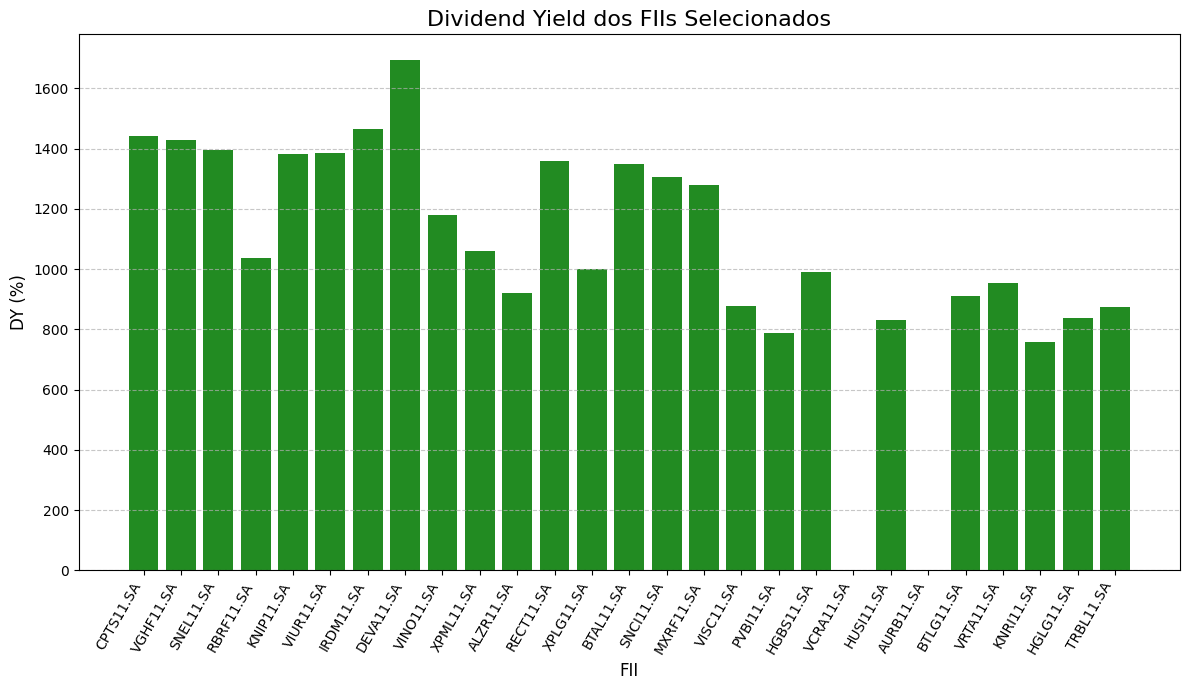

In [10]:
# Instale as bibliotecas necessárias
!pip install yfinance pandas matplotlib tqdm --quiet

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm # Para barra de progresso

# --- Função para obter uma lista (simulada) de FIIs da B3 ---
# NOTA IMPORTANTE:
# O yfinance NÃO fornece uma lista completa de FIIs.
# Para obter *todos* os FIIs da B3, você precisaria:
# 1. Usar uma API de dados financeiros que ofereça essa lista (ex: BrazilData.io, Alpha Vantage com ajuste, etc.).
# 2. Realizar web scraping de um site como statusinvest.com.br, fundsexplorer.com.br, ou investing.com (requer bibliotecas como requests e BeautifulSoup e é sujeito a mudanças na estrutura do site).
#
# Por simplicidade e para o propósito de demonstrar o aprimoramento,
# vou usar uma lista MAIOR de FIIs conhecidos.
# VOCÊ PRECISARÁ SUBSTITUIR ESTA LISTA por uma forma dinâmica de obtê-la
# se realmente quiser *todos* os FIIs.
def obter_todos_fiis_b3_simulado():
    """
    Função simulada para obter uma lista mais abrangente de FIIs da B3.
    Em um ambiente real, esta função faria web scraping ou chamaria uma API.
    """
    # Esta é apenas uma lista de exemplo maior.
    # Em produção, você substituiria isso por uma lógica de raspagem ou API.
    fiis_comuns = [
        'HGLG11.SA', 'KNRI11.SA', 'MXRF11.SA', 'VISC11.SA', 'RBRF11.SA',
        'SNCI11.SA', 'CPTS11.SA', 'IRDM11.SA', 'AURB11.SA', 'HGBS11.SA',
        'XPML11.SA', 'RECT11.SA', 'XPLG11.SA', 'SNCI11.SA', 'BTLG11.SA',
        'PVBI11.SA', 'BTAL11.SA', 'VRTA11.SA', 'VGHF11.SA', 'DEVA11.SA',
        'KNIP11.SA', 'HGBS11.SA', 'TRBL11.SA', 'ALZR11.SA', 'VINO11.SA',
        'VIUR11.SA', 'VCRA11.SA', 'HUSI11.SA', 'SNEL11.SA'
    ]
    # Você pode tentar adicionar mais FIIs se tiver uma lista.
    # Exemplo (se você souber como raspar):
    # import requests
    # from bs4 import BeautifulSoup
    # url = "https://statusinvest.com.br/fundos-imobiliarios/busca-avancada"
    # response = requests.get(url)
    # soup = BeautifulSoup(response.text, 'html.parser')
    # # ... lógica para extrair os tickers ...
    # return lista_de_tickers
    return [fii for fii in fiis_comuns if isinstance(fii, str)] # Garante que sejam strings

fiis = obter_todos_fiis_b3_simulado()
print(f"Tentando analisar {len(fiis)} FIIs da B3 (lista simulada).")

# --- Função que coleta dados do FII ---
def pega_dados_fii(fii):
    try:
        ticker = yf.Ticker(fii)
        info = ticker.info

        # Verifica se 'info' não está vazio ou contém erro (comum em tickers inválidos)
        if not info or 'regularMarketPrice' not in info: # 'regularMarketPrice' é um bom indicador de dados válidos
            print(f"Aviso: Dados incompletos ou FII não encontrado para {fii}. Pulando.")
            return None

        # Usar .get() com valor padrão e tratamento de None/0 para evitar erros
        dy = info.get('dividendYield', 0)
        p_vp = info.get('priceToBook', 0)
        volume = info.get('averageDailyVolume10Day', 0)

        # Tratar casos onde .get() retorna None (transformar em 0 para cálculos)
        dy = dy if dy is not None else 0
        p_vp = p_vp if p_vp is not None else 0
        volume = volume if volume is not None else 0

        return {
            'FII': fii,
            'DY (%)': round(dy * 100, 2),
            'P/VP': round(p_vp, 2),
            'Liquidez Média': int(volume)
        }
    except Exception as e:
        print(f"Erro ao coletar dados para {fii}: {e}. Pulando.")
        return None

# --- Coletar dados de todos os FIIs com barra de progresso ---
# Usamos tqdm para visualizar o progresso, especialmente útil com muitos FIIs.
dados = [pega_dados_fii(fii) for fii in tqdm(fiis, desc="Coletando dados dos FIIs")]
df = pd.DataFrame([d for d in dados if d is not None])

# --- Remover linhas com dados inválidos (se ainda houver) e FIIs duplicados ---
# Após a coleta, pode haver FIIs que foram parcialmente coletados ou duplicados (menos provável)
df = df.dropna().drop_duplicates(subset=['FII'])

# --- Criar ranking por critério ---
# Verifica se o DataFrame não está vazio antes de tentar ranquear
if not df.empty:
    df['Rank_DY'] = df['DY (%)'].rank(ascending=False, method='min')
    df['Rank_PVP'] = df['P/VP'].rank(ascending=True, method='min')
    df['Rank_LIQ'] = df['Liquidez Média'].rank(ascending=False, method='min')

    # Soma total dos rankings
    df['Score_Total'] = df['Rank_DY'] + df['Rank_PVP'] + df['Rank_LIQ']

    # Ordenar pelos melhores
    df = df.sort_values(by='Score_Total')

    # --- Exibir resultado ---
    print("\n" + "="*30)
    print("Ranking dos Melhores FIIs:")
    print("="*30)
    display(df[['FII', 'DY (%)', 'P/VP', 'Liquidez Média', 'Score_Total']])

    # --- Gráfico visual do DY ---
    plt.figure(figsize=(12,7))
    plt.bar(df['FII'], df['DY (%)'], color='forestgreen')
    plt.title('Dividend Yield dos FIIs Selecionados', fontsize=16)
    plt.ylabel('DY (%)', fontsize=12)
    plt.xlabel('FII', fontsize=12)
    plt.xticks(rotation=60, ha='right', fontsize=10) # Melhora a rotação e alinhamento dos rótulos
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout() # Ajusta o layout para evitar cortes
    plt.show()
else:
    print("\nNenhum FII válido foi encontrado ou coletado para análise.")